In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

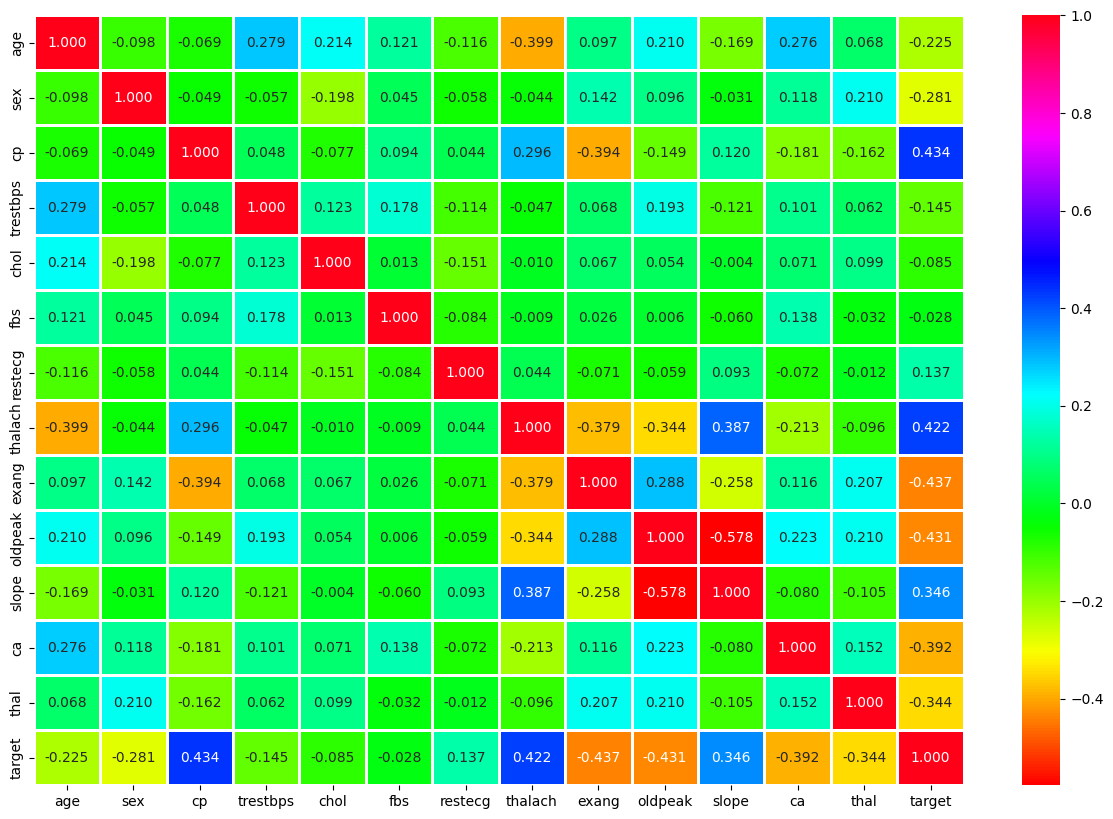

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

<ipython-input-11-ccdaef4ed91c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'], rug=True)


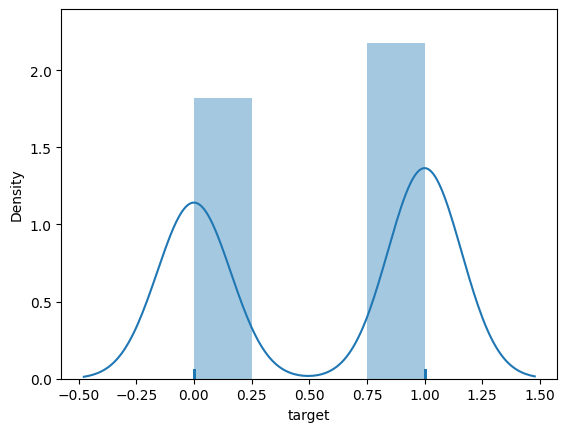

In [ ]:
sns.distplot(df['target'], rug=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(columns=['target'],axis=1)
y=df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_test = scaler.fit_transform(X_test)
X_train = scaler.transform(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

In [ ]:
nn1 = [
    layers.Dense(32,input_dim=13, kernel_initializer='uniform', activation='relu'),
    layers.Dense(16,kernel_initializer='uniform', activation='relu'),
    layers.Dense(16,kernel_initializer='uniform', activation='relu'),
    layers.Dense(1,kernel_initializer='uniform', activation='sigmoid'),
]

In [ ]:
model = Sequential(nn1)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
25/25 [==============================] - 3s 3ms/step - loss: 0.6929 - accuracy: 0.5496
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5496
Epoch 3/150
25/25 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.7645
Epoch 4/150
25/25 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7975
Epoch 5/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8140
Epoch 6/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 7/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3571 - accuracy: 0.8636
Epoch 8/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.8636
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3317 - accuracy: 0.8595
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8719
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred[0:10]

2/2 [==============================] - 0s 9ms/step


array([[2.2137650e-04],
       [1.3011332e-02],
       [1.0000000e+00],
       [2.6881883e-10],
       [9.9988759e-01],
       [1.0000000e+00],
       [9.9926609e-01],
       [2.2173951e-23],
       [6.3717673e-12],
       [4.7327196e-03]], dtype=float32)

In [ ]:
y_pred = y_pred.round()
y_pred[0:10]


array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy of the model:  0.8360655737704918


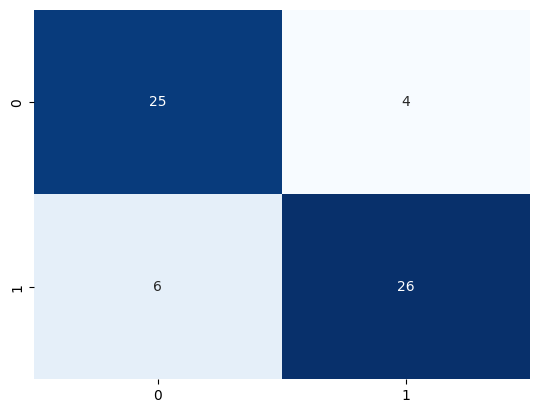

In [ ]:
cm = confusion_matrix(y_test , y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ', ac)